# **Extraindo dados diretamente da API do Banco Central**

***Por:*** SRS by 2S

***Data:*** 2024-03-20


# Informações sobre as séries históricas

***Documentação***

https://dadosabertos.bcb.gov.br/dataset/20542-saldo-da-carteira-de-credito-com-recursos-livres---total/resource/6e2b0c97-afab-4790-b8aa-b9542923cf88

***Origem dos dados***

Banco de Dados: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries




***Índices extraídos:***

- **SELIC**: Taxa Básica de Juros da Economia Brasileira, também conhecida como Sistema Especial de Liquidação e de Custódia. É utilizada pelo Banco Central do Brasil como instrumento para controle da inflação e das taxas de juros.
Início: 05/03/1999

- **ICC**: Índice de Confiança do Consumidor, que mede o sentimento dos consumidores em relação à economia, geralmente utilizado como indicador da disposição das pessoas para gastar. A sua apresentação se dá por período base de 100, ou seja, um valor de 110 indicaria que os consumidores estão 10% mais confiantes em relação à economia em comparação com o período base.
Início: 01/03/1990

- **PIB**: Produto Interno Bruto, que representa a soma de todos os bens e serviços finais produzidos por um país durante um determinado período, geralmente um ano.
Início: 01/01/1999

- **IPCA**: Índice de Preços ao Consumidor Amplo, que é o índice oficial de inflação no Brasil, utilizado para medir a variação média dos preços de uma cesta de produtos e serviços consumidos pela população.
Início: 01/12/1980

- **INCC**: Índice Nacional de Custo da Construção, utilizado para reajustes de contratos da construção civil, medindo a variação dos custos das construções habitacionais.
O índice é apresentado de forma percentual, representando a variação dos preços em relação a um período-base estabelecido. Por exemplo, se o INCC de um determinado mês é de 1%, isso significa que os custos da construção civil aumentaram 1% em relação ao período-base.
Início: 01/02/1944

- **DÓLAR**: Moeda dos Estados Unidos da América, amplamente utilizada como referência internacional em transações comerciais e financeiras.
Início: 28/11/1984



#Preparação de ambiente

In [ ]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objects as go
import yfinance as yf

from plotly.subplots import make_subplots
from datetime import datetime


#Extração dos dados para indices

In [ ]:
# Função para extração de dados diário ou mensal (usando a mediana)

def extracao_bcb(codigo, data_inicio, data_fim, tipo):
    url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}'.format(codigo, data_inicio, data_fim)
    df = pd.read_json(url)
    df.set_index('data', inplace=True)
    df.index = pd.to_datetime(df.index, dayfirst=True)

    if tipo == 'Mensal':
        # Resample dos dados diários para valores mensais, usando a média como agregação
        df = df.resample('M').median()

    return df


In [ ]:
# Parâmetros para realizar a extração de dados
indicadores = [
               (432, 'Selic'),
               (4393, 'ICC'),
               (4380, 'PIB'),
               (13522, 'IPCA'),
               (192, 'INCC'),
               (10813, 'Dolar')]

inicial = '28/02/2014'
final = '29/02/2024'

# Optar por qual tipo de exportação (diária ou mensal)
tipo = input('O dado exportado deverá ser diário ou mensal ? (D/M) : ')

if tipo.upper() == 'D':
  tipo = 'Diario'
else:
  tipo = 'Mensal'

# Loop para iterar sobre os indicadores
for codigo, nome in indicadores:
    # Executa a função extracao_bcb com os valores específicos
    df = extracao_bcb(codigo, inicial, final, tipo)
    globals()['df_' + nome] = df

# Optar por exportar os dados ou não
resposta = input('Deseja exportar os dados ? (S/N) : ')

if resposta.upper() == 'S':
    # Obtém a data e hora atual
    now = datetime.now().strftime("%Y%m%d%H%M%S")

    # Grava o dataframe em um arquivo CSV com o nome contendo o tipo e o nome do indicador
    for codigo, nome in indicadores:
        if tipo == 'Mensal':
            nome_arquivo = 'extracao_bcb_{}_{}_{}.csv'.format(tipo, nome, now)
        else:
            nome_arquivo = 'extracao_bcb_{}_{}_{}.csv'.format(tipo, nome, now)

        globals()['df_' + nome].to_csv(nome_arquivo)


O dado exportado deverá ser diário ou mensal ? (D/M) : m
Deseja exportar os dados ? (S/N) : n


In [ ]:
# Deixando os indices em uma única tabela
df_indices = pd.concat([df_Selic, df_ICC, df_PIB, df_IPCA, df_INCC, df_Dolar], axis=1)
df_indices.columns = ['SELIC', 'ICC', 'PIB', 'IPCA', 'INCC', 'Dolar']
df_indices.head(10)


,SELIC,ICC,PIB,IPCA,INCC,Dolar
data,,,,,,
2014-02-28,10.75,136.39,455501.7,5.68,0.33,2.33270
2014-03-31,10.75,125.78,477200.3,6.15,0.28,2.33330
2014-04-30,11.00,120.25,479721.1,6.28,0.88,2.23280
2014-05-31,11.00,109.48,481273.5,6.37,2.05,2.21810
2014-06-30,11.00,107.37,461327.2,6.52,0.66,2.23185
2014-07-31,11.00,109.55,486905.1,6.50,0.75,2.21980
2014-08-31,11.00,110.54,483778.7,6.51,0.08,2.26860
2014-09-30,11.00,118.92,491441.7,6.75,0.15,2.33615
2014-10-31,11.00,115.82,508969.9,6.59,0.17,2.44700


#Análises iniciais sobre os dados dos indices

In [ ]:
# Quantidade de linhas
print(f'Lines: {df_indices.shape[0]}')


Lines: 121


In [ ]:
# Dataset structure
df_indices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2014-02-28 to 2024-02-29
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SELIC   121 non-null    float64
 1   ICC     121 non-null    float64
 2   PIB     120 non-null    float64
 3   IPCA    121 non-null    float64
 4   INCC    121 non-null    float64
 5   Dolar   121 non-null    float64
dtypes: float64(6)
memory usage: 10.7 KB


In [ ]:
# Verificando se temos dados faltantes
df_indices.isnull().sum()


SELIC    0
ICC      0
PIB      1
IPCA     0
INCC     0
Dolar    0
dtype: int64

In [ ]:
# Preencher NaN com o primeiro valor encontrado
df_indices.fillna(method='ffill', inplace=True)

# Verificando novamente se temos dados faltantes
df_indices.isnull().sum()


SELIC    0
ICC      0
PIB      0
IPCA     0
INCC     0
Dolar    0
dtype: int64

In [ ]:
# Verifica se tem registro duplicado
duplicidade = df_indices.duplicated(keep='first').sum()
print('Qtde de Linhas duplicadas: ', duplicidade)

#Para excluir as duplicidades
#df_indices.drop_duplicates(keep='first', inplace=True)


Qtde de Linhas duplicadas:  0


#Análise de Correlação entre os indices

---



In [ ]:
# Correlaçao no formato matriz
corr_indices = df_indices.corr()
corr_indices


,SELIC,ICC,PIB,IPCA,INCC,Dolar
SELIC,1.000000,-0.162967,0.014792,0.481628,-0.199930,-0.328914
ICC,-0.162967,1.000000,0.476450,-0.443609,-0.245503,0.179369
PIB,0.014792,0.476450,1.000000,0.028186,0.053756,0.797005
IPCA,0.481628,-0.443609,0.028186,1.000000,0.291030,0.057380
INCC,-0.199930,-0.245503,0.053756,0.291030,1.000000,0.190370
Dolar,-0.328914,0.179369,0.797005,0.057380,0.190370,1.000000


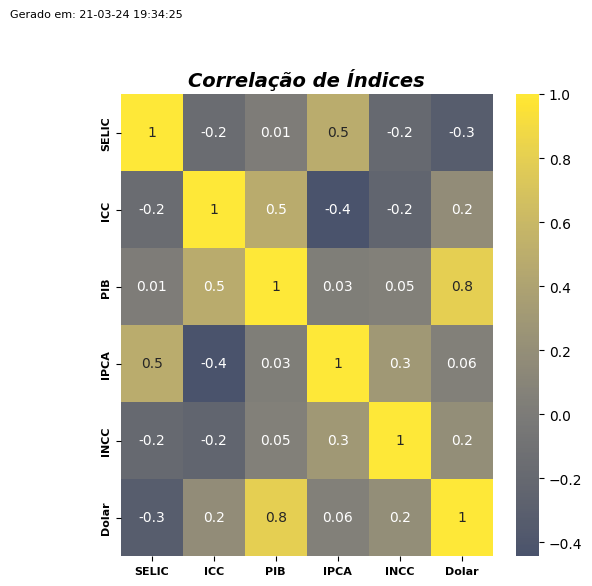

In [ ]:
# Gerar heatmap
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(corr_indices, cmap='cividis', center=0, annot=True, fmt='.1g')

# Ajustar tamanho da letra e colocar em negrito as labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=8, fontweight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8, fontweight='bold')

# Adicionar informação de data e hora no canto inferior direito
now = datetime.now()
plt.text(1, -1, f'Gerado em: {now.strftime("%d-%m-%y %H:%M:%S")}', fontsize=8, ha='right')

# Adicionar título em negrito e itálico
plt.title('Correlação de Índices', fontsize=14, fontweight='bold', style='italic')

# Exportar o gráfico como .jpg
plt.savefig('corr_indices.jpg', format='jpg', bbox_inches='tight')

plt.show()


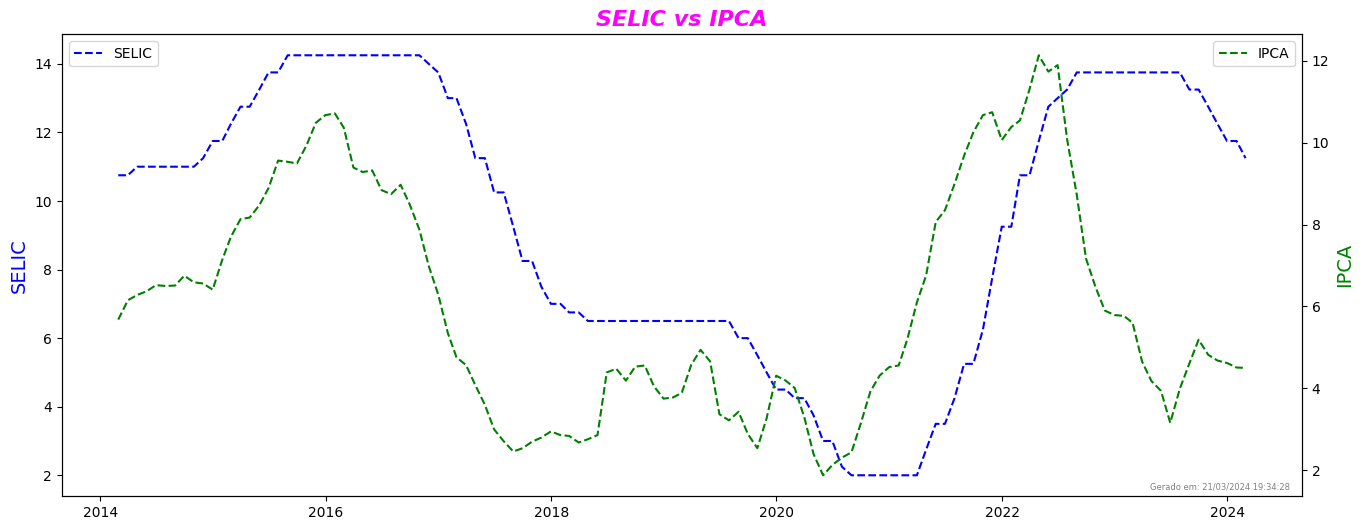

In [ ]:
# Criar figura e eixos
fig, ax1 = plt.subplots(figsize=(16, 6))  # Largura: 18 polegadas, Altura: 6 polegadas

# Criar segundo eixo
ax2 = ax1.twinx()

# Plotar dados no primeiro eixo
ax1.plot(df_indices.index, df_indices['SELIC'], color='blue', linestyle='--', label='SELIC')
ax1.set_ylabel('SELIC', color='blue', fontsize=14)

# Plotar dados no segundo eixo
ax2.plot(df_indices.index, df_indices['IPCA'], color='green', linestyle='--', label='IPCA')
ax2.set_ylabel('IPCA', color='green', fontsize=14)

# Adicionar título
plt.title('SELIC vs IPCA', fontsize=16, color='magenta', fontweight='bold', fontstyle='italic')

# Adicionar legenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotacionar a legenda do eixo x em 45 graus
plt.xticks(rotation=45)

# Adicionar data e hora
now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
plt.text(0.99, 0.01, f'Gerado em: {now}', verticalalignment='bottom', horizontalalignment='right',
         transform=ax1.transAxes, color='gray', fontsize=6)

# Exportar a imagem
#plt.savefig('GRAF SELIC VS IPCA.jpg')

# Exibir o gráfico
plt.show()


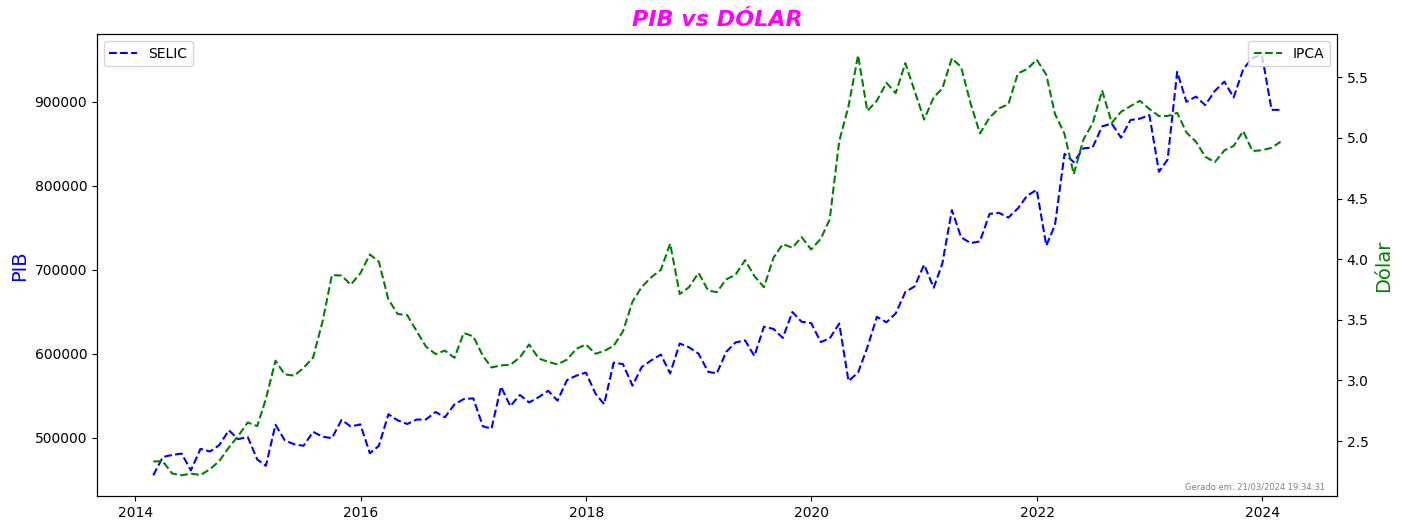

In [ ]:
# Criar figura e eixos
fig, ax1 = plt.subplots(figsize=(16, 6))  # Largura: 18 polegadas, Altura: 6 polegadas

# Criar segundo eixo
ax2 = ax1.twinx()

# Plotar dados no primeiro eixo
ax1.plot(df_indices.index, df_indices['PIB'], color='blue', linestyle='--', label='SELIC')
ax1.set_ylabel('PIB', color='blue', fontsize=14)

# Plotar dados no segundo eixo
ax2.plot(df_indices.index, df_indices['Dolar'], color='green', linestyle='--', label='IPCA')
ax2.set_ylabel('Dólar', color='green', fontsize=14)

# Adicionar título
plt.title('PIB vs DÓLAR', fontsize=16, color='magenta', fontweight='bold', fontstyle='italic')

# Adicionar legenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotacionar a legenda do eixo x em 45 graus
plt.xticks(rotation=45)

# Adicionar data e hora
now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
plt.text(0.99, 0.01, f'Gerado em: {now}', verticalalignment='bottom', horizontalalignment='right',
         transform=ax1.transAxes, color='gray', fontsize=6)

# Exportar a imagem
#plt.savefig('GRAF PIB VS DOLAR.jpg')

# Exibir o gráfico
plt.show()


In [ ]:
# SELIC versus IPCA

fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='SELIC', x=df_indices.index, y=df_indices['SELIC']), row=1, col=1)
fig.add_trace(go.Scatter(name='IPCA', x=df_indices.index, y=df_indices['IPCA']), row=1, col=1, secondary_y=False)

# Formatar o layout
fig.update_layout(
    title={
        'text': '<b><i>SELIC VS IPCA</i></b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16, 'color': 'magenta'}
    },
    xaxis={'title': {'text': 'Data', 'font': {'size': 12, 'color': 'blue'}}, 'tickfont': {'size': 10, 'color': 'blue'}, 'tickangle': 45},
    yaxis={'title': {'text': 'Valor', 'font': {'size': 12, 'color': 'green'}}, 'tickfont': {'size': 10, 'color': 'green'}},
    template='simple_white'
)

# Adicionar data e hora da geração do gráfico
now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
fig.add_annotation(
    xref='paper', yref='paper',
    x=0.93, y=0.01,
    text=f'Gerado em: {now}',
    showarrow=False,
    font=dict(size=10, color='gray')
)

fig.show()

# Exportar o gráfico como uma imagem JPG
#fig.write_image("SELIC VS IPCA.jpg")


In [ ]:
# PIB versus Dólar

fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='PIB', x=df_indices.index, y=df_indices['PIB']), row=1, col=1)
fig.add_trace(go.Scatter(name='Dólar', x=df_indices.index, y=df_indices['Dolar']), row=1, col=1, secondary_y=True)

# Formatar o layout
fig.update_layout(
    title={
        'text': '<b><i>PIB VS DÓLAR</i></b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16, 'color': 'magenta'}
    },
    xaxis={'title': {'text': 'Data', 'font': {'size': 12, 'color': 'blue'}}, 'tickfont': {'size': 10, 'color': 'blue'}, 'tickangle': 45},

    yaxis={'title': {'text': 'Valor', 'font': {'size': 12, 'color': 'green'}}, 'tickfont': {'size': 10, 'color': 'green'}},
    template='simple_white'
)

# Adicionar data e hora da geração do gráfico
now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
fig.add_annotation(
    xref='paper', yref='paper',
    x=0.93, y=0.01,
    text=f'Gerado em: {now}',
    showarrow=False,
    font=dict(size=10, color='gray')
)

fig.show()

# Exportar o gráfico como uma imagem JPG
#fig.write_image("PIB VS DÓLAR.jpg")


---------


#Análise de correlações entre os dados fundos de investimentos imobiliários com os indices


In [ ]:
# Parâmetros para realizar a extração de dados
indicadores = [
               (432, 'Selic'),
               (4393, 'ICC'),
               (4380, 'PIB'),
               (13522, 'IPCA'),
               (192, 'INCC'),
               (10813, 'Dolar')]

inicial = '28/02/2014'
final = '29/02/2024'

# Optar por qual tipo de exportação (diária ou mensal)
tipo = input('O dado exportado deverá ser diário ou mensal ? (D/M) : ')

if tipo.upper() == 'D':
  tipo = 'Diario'
else:
  tipo = 'Mensal'

# Loop para iterar sobre os indicadores
for codigo, nome in indicadores:
    # Executa a função extracao_bcb com os valores específicos
    df = extracao_bcb(codigo, inicial, final, tipo)
    globals()['df_' + nome] = df

# Optar por exportar os dados ou não
resposta = input('Deseja exportar os dados ? (S/N) : ')

if resposta.upper() == 'S':
    # Obtém a data e hora atual
    now = datetime.now().strftime("%Y%m%d%H%M%S")

    # Grava o dataframe em um arquivo CSV com o nome contendo o tipo e o nome do indicador
    for codigo, nome in indicadores:
        if tipo == 'Mensal':
            nome_arquivo = 'extracao_bcb_{}_{}_{}.csv'.format(tipo, nome, now)
        else:
            nome_arquivo = 'extracao_bcb_{}_{}_{}.csv'.format(tipo, nome, now)

        globals()['df_' + nome].to_csv(nome_arquivo)

O dado exportado deverá ser diário ou mensal ? (D/M) : d
Deseja exportar os dados ? (S/N) : n


In [ ]:
df_diario = pd.concat([df_Selic, df_ICC, df_PIB, df_IPCA, df_INCC, df_Dolar], axis=1)
df_diario.columns = ['SELIC', 'ICC', 'PIB', 'IPCA', 'INCC', 'Dolar']
df_diario.head(10)

,SELIC,ICC,PIB,IPCA,INCC,Dolar
data,,,,,,
2014-02-01,NaN,136.39,455501.7,5.68,0.33,NaN
2014-02-28,10.75,NaN,NaN,NaN,NaN,2.3327
2014-03-01,10.75,125.78,477200.3,6.15,0.28,NaN
2014-03-02,10.75,NaN,NaN,NaN,NaN,NaN
2014-03-03,10.75,NaN,NaN,NaN,NaN,NaN
2014-03-04,10.75,NaN,NaN,NaN,NaN,NaN
2014-03-05,10.75,NaN,NaN,NaN,NaN,2.3234
2014-03-06,10.75,NaN,NaN,NaN,NaN,2.3088
2014-03-07,10.75,NaN,NaN,NaN,NaN,2.3376


In [ ]:
# Quantidade de linhas
print(f'Lines: {df_diario.shape[0]}')


Lines: 3655


In [ ]:
# Verificando se temos dados faltantes
df_diario.isnull().sum()


SELIC       1
ICC      3534
PIB      3535
IPCA     3534
INCC     3534
Dolar    1147
dtype: int64

In [ ]:
# Preencher NaN com o primeiro valor encontrado
df_diario.fillna(method='ffill', inplace=True)

# Verificando novamente se temos dados faltantes
df_diario.isnull().sum()


SELIC    1
ICC      0
PIB      0
IPCA     0
INCC     0
Dolar    1
dtype: int64

In [ ]:
# Preencher NaN com o próximo valor encontrado
df_diario.fillna(method='bfill', inplace=True)

# Dropar linhas com NaN
#df_diario = df.dropna(axis=1)
#df_diario.head(10)

# Verificando (novamente) se temos dados faltantes
df_diario.isnull().sum()


SELIC    0
ICC      0
PIB      0
IPCA     0
INCC     0
Dolar    0
dtype: int64

In [ ]:
#Fundo Imobiliario -

#BRCR11 - Lajes corporativas
#HGLG11 - Imóveis industriais logísticos
#KNCR11 - Fundo de papel
#RBRF11 - FoF

#lista_fiis = ['CPTS11.SA', 'RBRR11.SA','MCCI11.SA','KNCR11.SA', 'BRCO11.SA','LVBI11.SA','XPLG11.SA', 'PVBI11.SA','XPML11.SA','VISC11.SA', 'RBRF11.SA','TGAR11.SA']
lista_fiis = ['BRCR11.SA', 'HGLG11.SA', 'KNCR11.SA', 'RBRF11.SA']
df_fiis = yf.download(lista_fiis, start='2022-02-28', end='2024-02-29')['Adj Close']
df_fiis



[*********************100%%**********************]  4 of 4 completed


Ticker,BRCR11.SA,HGLG11.SA,KNCR11.SA,RBRF11.SA
Date,,,,
2022-03-02,58.355038,135.587875,76.160194,5.890585
2022-03-03,58.177536,135.359131,76.283043,5.918584
2022-03-04,58.338131,134.068405,76.482658,5.928467
2022-03-07,57.475983,132.990097,76.505684,5.888939
2022-03-08,56.808247,131.732132,76.736008,5.851880
...,...,...,...,...
2024-02-22,57.951138,165.124527,102.923012,8.067582
2024-02-23,58.517242,165.174194,102.873466,8.147065
2024-02-26,57.682987,165.621292,103.309456,8.027840


In [ ]:
# Crias um único dataframe com os valores dos FIIS e os Índices
df_fiis_e_indices = pd.merge(df_fiis,df_diario, how='inner', left_index=True, right_index=True)
df_fiis_e_indices.head(15)


,BRCR11.SA,HGLG11.SA,KNCR11.SA,RBRF11.SA,SELIC,ICC,PIB,IPCA,INCC,Dolar
2022-03-02,58.355038,135.587875,76.160194,5.890585,10.75,105.12,837767.2,11.3,0.86,5.1341
2022-03-03,58.177536,135.359131,76.283043,5.918584,10.75,105.12,837767.2,11.3,0.86,5.0473
2022-03-04,58.338131,134.068405,76.482658,5.928467,10.75,105.12,837767.2,11.3,0.86,5.0752
2022-03-07,57.475983,132.990097,76.505684,5.888939,10.75,105.12,837767.2,11.3,0.86,5.0573
2022-03-08,56.808247,131.732132,76.736008,5.851880,10.75,105.12,837767.2,11.3,0.86,5.0897
2022-03-09,56.782906,131.928131,77.173622,5.864234,10.75,105.12,837767.2,11.3,0.86,5.0088
2022-03-10,56.588490,131.560547,76.943329,5.855998,10.75,105.12,837767.2,11.3,0.86,5.0507
2022-03-11,55.861584,131.928131,76.352135,5.764588,10.75,105.12,837767.2,11.3,0.86,5.0249
2022-03-14,55.793968,131.356308,75.998970,5.727530,10.75,105.12,837767.2,11.3,0.86,5.0641
2022-03-15,56.089794,131.519730,76.766708,5.721766,10.75,105.12,837767.2,11.3,0.86,5.1308


In [ ]:
# Criando a tabela de correlação
corr_FIIs = df_fiis_e_indices.corr()
corr_FIIs


,BRCR11.SA,HGLG11.SA,KNCR11.SA,RBRF11.SA,SELIC,ICC,PIB,IPCA,INCC,Dolar
BRCR11.SA,1.000000,0.343498,0.254276,0.639689,-0.238081,0.057261,0.093396,-0.043334,0.007011,-0.534199
HGLG11.SA,0.343498,1.000000,0.920754,0.866634,-0.081109,0.844497,0.664820,-0.810863,-0.604985,-0.303442
KNCR11.SA,0.254276,0.920754,1.000000,0.846847,-0.335285,0.859716,0.677233,-0.681386,-0.482616,-0.341245
RBRF11.SA,0.639689,0.866634,0.846847,1.000000,-0.269452,0.683073,0.595467,-0.572749,-0.405746,-0.488443
SELIC,-0.238081,-0.081109,-0.335285,-0.269452,1.000000,-0.039320,0.010006,-0.304163,-0.214628,0.432845
ICC,0.057261,0.844497,0.859716,0.683073,-0.039320,1.000000,0.637969,-0.879627,-0.598544,-0.223155
PIB,0.093396,0.664820,0.677233,0.595467,0.010006,0.637969,1.000000,-0.666952,-0.446564,-0.218559
IPCA,-0.043334,-0.810863,-0.681386,-0.572749,-0.304163,-0.879627,-0.666952,1.000000,0.718010,0.094642
INCC,0.007011,-0.604985,-0.482616,-0.405746,-0.214628,-0.598544,-0.446564,0.718010,1.000000,-0.127432
Dolar,-0.534199,-0.303442,-0.341245,-0.488443,0.432845,-0.223155,-0.218559,0.094642,-0.127432,1.000000


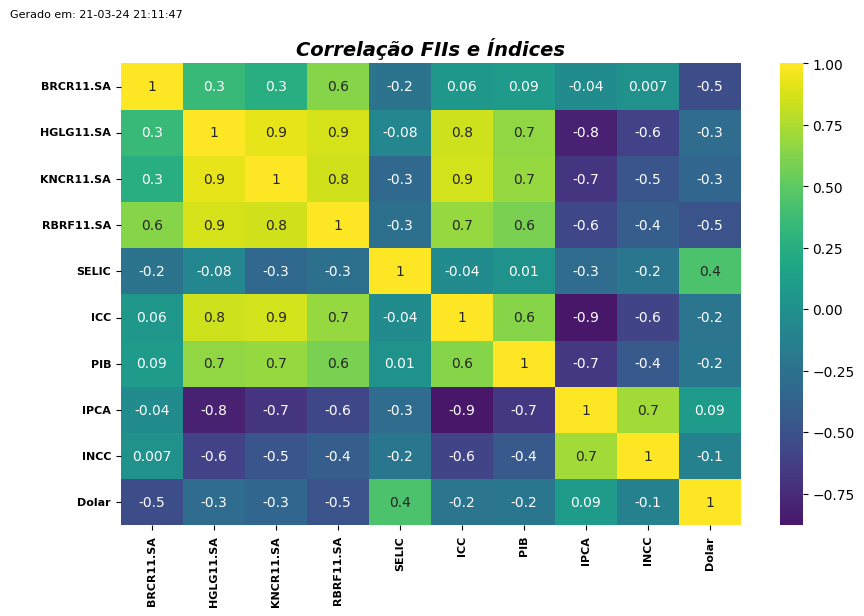

In [ ]:
# Gerar heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr_FIIs, cmap='viridis', center=0, annot=True, fmt='.1g')

# Ajustar tamanho da letra e colocar em negrito as labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=8, fontweight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8, fontweight='bold')

# Adicionar informação de data e hora no canto inferior direito
now = datetime.now()
plt.text(1, -1, f'Gerado em: {now.strftime("%d-%m-%y %H:%M:%S")}', fontsize=8, ha='right')

# Adicionar título em negrito e itálico
plt.title('Correlação FIIs e Índices', fontsize=14, fontweight='bold', style='italic')

# Exportar o gráfico como .jpg
plt.savefig('corr_FIIs.jpg', format='jpg', bbox_inches='tight')

plt.show()


In [ ]:
# BRCR11.SA versus PIB (maior correlacao positiva)

fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='BRCR11.SA', x=df_fiis_e_indices.index, y=df_fiis_e_indices['HGLG11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='PIB', x=df_fiis_e_indices.index, y=df_fiis_e_indices['PIB']), row=1, col=1, secondary_y=True)

# Formatar o layout
fig.update_layout(
    title={
        'text': '<b><i>BRCR11.SA VS PIB - Maior correlação (com índices) positiva encontrada (0.09)</i></b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16, 'color': 'magenta'}
    },
    xaxis={'title': {'text': 'Data', 'font': {'size': 12, 'color': 'blue'}}, 'tickfont': {'size': 10, 'color': 'blue'}, 'tickangle': 45},
    yaxis={'title': {'text': 'Valor', 'font': {'size': 12, 'color': 'green'}}, 'tickfont': {'size': 10, 'color': 'green'}},
    template='simple_white'
)

# Adicionar data e hora da geração do gráfico
now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
fig.add_annotation(
    xref='paper', yref='paper',
    x=0.93, y=0.01,
    text=f'Gerado em: {now}',
    showarrow=False,
    font=dict(size=10, color='gray')
)

fig.show()

# Exportar o gráfico como uma imagem JPG
#fig.write_image("SELIC VS IPCA.jpg")


# Encontrar a série com a maior correlação negativa com HGLG11.SA
correlations = df_fiis_e_indices.corr()['HGLG11.SA']
series_name = correlations.idxmin()


In [ ]:
# HGLG11.SA versus IPCA (maior correlação negativa) versus ICC (maior correlacao positiva)

fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='HGLG11.SA', x=df_fiis_e_indices.index, y=df_fiis_e_indices['HGLG11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='ICC', x=df_fiis_e_indices.index, y=df_fiis_e_indices['ICC']), row=1, col=1, secondary_y=False)
fig.add_trace(go.Scatter(name='IPCA', x=df_fiis_e_indices.index, y=df_fiis_e_indices['IPCA']), row=1, col=1, secondary_y=True)

# Formatar o layout
fig.update_layout(
    title={
        'text': '<b><i>HGLG11.SA VS ICC VS IPCA - Maior e Menor correlação (com índices) encontrada (0.8 e -0.8)</i></b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16, 'color': 'magenta'}
    },
    xaxis={'title': {'text': 'Data', 'font': {'size': 12, 'color': 'blue'}}, 'tickfont': {'size': 10, 'color': 'blue'}, 'tickangle': 45},
    yaxis={'title': {'text': 'Valor', 'font': {'size': 12, 'color': 'green'}}, 'tickfont': {'size': 10, 'color': 'green'}},
    template='simple_white'
)

# Adicionar data e hora da geração do gráfico
now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
fig.add_annotation(
    xref='paper', yref='paper',
    x=0.93, y=0.01,
    text=f'Gerado em: {now}',
    showarrow=False,
    font=dict(size=10, color='gray')
)

fig.show()

# Exportar o gráfico como uma imagem JPG
#fig.write_image("SELIC VS IPCA.jpg")


In [ ]:
# KNCR11.SA versus Dólar (menor correlação negativa)

fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='BRCR11.SA', x=df_fiis_e_indices.index, y=df_fiis_e_indices['BRCR11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='Dólar', x=df_fiis_e_indices.index, y=df_fiis_e_indices['Dolar']), row=1, col=1, secondary_y=True)

# Formatar o layout
fig.update_layout(
    title={
        'text': '<b><i>KNCR11.SA VS DÓLAR - Menor correlação (com índices) negativa encontrada (-0.3)</i></b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16, 'color': 'magenta'}
    },
    xaxis={'title': {'text': 'Data', 'font': {'size': 12, 'color': 'blue'}}, 'tickfont': {'size': 10, 'color': 'blue'}, 'tickangle': 45},
    yaxis={'title': {'text': 'Valor', 'font': {'size': 12, 'color': 'green'}}, 'tickfont': {'size': 10, 'color': 'green'}},
    template='simple_white'
)

# Adicionar data e hora da geração do gráfico
now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
fig.add_annotation(
    xref='paper', yref='paper',
    x=0.93, y=0.01,
    text=f'Gerado em: {now}',
    showarrow=False,
    font=dict(size=10, color='gray')
)

fig.show()

# Exportar o gráfico como uma imagem JPG
#fig.write_image("SELIC VS IPCA.jpg")


In [ ]:
# RBRF11.SA versus INCC (menor correlação negativa)

fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='RBRF11.SA', x=df_fiis_e_indices.index, y=df_fiis_e_indices['BRCR11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='INCC', x=df_fiis_e_indices.index, y=df_fiis_e_indices['INCC']), row=1, col=1, secondary_y=True)

# Formatar o layout
fig.update_layout(
    title={
        'text': '<b><i>RBRF11.SA VS INCC - Menor correlação (com índices) negativa encontrada (-0.4)</i></b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16, 'color': 'magenta'}
    },
    xaxis={'title': {'text': 'Data', 'font': {'size': 12, 'color': 'blue'}}, 'tickfont': {'size': 10, 'color': 'blue'}, 'tickangle': 45},
    yaxis={'title': {'text': 'Valor', 'font': {'size': 12, 'color': 'green'}}, 'tickfont': {'size': 10, 'color': 'green'}},
    template='simple_white'
)

# Adicionar data e hora da geração do gráfico
now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
fig.add_annotation(
    xref='paper', yref='paper',
    x=0.93, y=0.01,
    text=f'Gerado em: {now}',
    showarrow=False,
    font=dict(size=10, color='gray')
)

fig.show()

# Exportar o gráfico como uma imagem JPG
#fig.write_image("SELIC VS IPCA.jpg")


#Análise de correlações entre os dados de ações com os indices

In [ ]:
# Buscando os dados do indice Bovespa
df_ibov = pd.DataFrame()
df_ibov['IBOV'] = yf.download('^BVSP', start='2014-02-28', end='2024-02-29')['Adj Close']
df_ibov.head()


[*********************100%%**********************]  1 of 1 completed


,IBOV
Date,
2014-02-28,47094.0
2014-03-05,46589.0
2014-03-06,47093.0
2014-03-07,46244.0
2014-03-10,45533.0


In [ ]:
# Crias um único dataframe com os valores dos FIIS e os Índices
df_ibov_e_indices = pd.merge(df_ibov,df_diario, how='inner', left_index=True, right_index=True)
df_ibov_e_indices.head(15)


,IBOV,SELIC,ICC,PIB,IPCA,INCC,Dolar
2014-02-28,47094.0,10.75,136.39,455501.7,5.68,0.33,2.3327
2014-03-05,46589.0,10.75,125.78,477200.3,6.15,0.28,2.3234
2014-03-06,47093.0,10.75,125.78,477200.3,6.15,0.28,2.3088
2014-03-07,46244.0,10.75,125.78,477200.3,6.15,0.28,2.3376
2014-03-10,45533.0,10.75,125.78,477200.3,6.15,0.28,2.3404
2014-03-11,45698.0,10.75,125.78,477200.3,6.15,0.28,2.3455
2014-03-12,45862.0,10.75,125.78,477200.3,6.15,0.28,2.3643
2014-03-13,45444.0,10.75,125.78,477200.3,6.15,0.28,2.3480
2014-03-14,44966.0,10.75,125.78,477200.3,6.15,0.28,2.3631
2014-03-17,45118.0,10.75,125.78,477200.3,6.15,0.28,2.3513


In [ ]:
 # Criando a tabela de correlação
corr_IBOV = df_ibov_e_indices.corr()
corr_IBOV


,IBOV,SELIC,ICC,PIB,IPCA,INCC,Dolar
IBOV,1.000000,-0.423008,0.576148,0.848865,-0.188750,0.111363,0.791300
SELIC,-0.423008,1.000000,-0.167303,0.021154,0.482270,-0.192579,-0.328163
ICC,0.576148,-0.167303,1.000000,0.513641,-0.444182,-0.243226,0.215931
PIB,0.848865,0.021154,0.513641,1.000000,0.030261,0.050130,0.791825
IPCA,-0.188750,0.482270,-0.444182,0.030261,1.000000,0.292954,0.055983
INCC,0.111363,-0.192579,-0.243226,0.050130,0.292954,1.000000,0.184935
Dolar,0.791300,-0.328163,0.215931,0.791825,0.055983,0.184935,1.000000


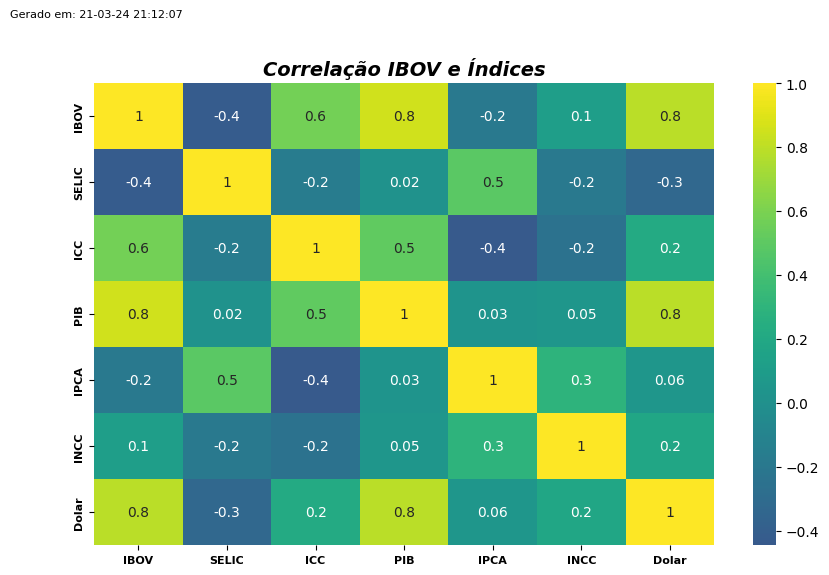

In [ ]:
# Gerar heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr_IBOV, cmap='viridis', center=0, annot=True, fmt='.1g')

# Ajustar tamanho da letra e colocar em negrito as labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=8, fontweight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8, fontweight='bold')

# Adicionar informação de data e hora no canto inferior direito
now = datetime.now()
plt.text(1, -1, f'Gerado em: {now.strftime("%d-%m-%y %H:%M:%S")}', fontsize=8, ha='right')

# Adicionar título em negrito e itálico
plt.title('Correlação IBOV e Índices', fontsize=14, fontweight='bold', style='italic')

# Exportar o gráfico como .jpg
plt.savefig('corr_FIIs.jpg', format='jpg', bbox_inches='tight')

plt.show()


In [ ]:
# IBOV versus Selic (maior correlação negativa)

fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='IBOV', x=df_ibov_e_indices.index, y=df_ibov_e_indices['IBOV']), row=1, col=1)
fig.add_trace(go.Scatter(name='SELIC', x=df_ibov_e_indices.index, y=df_ibov_e_indices['SELIC']), row=1, col=1, secondary_y=True)

# Formatar o layout
fig.update_layout(
    title={
        'text': '<b><i>IBOV VS SELIC - Maior correlação (com índices) negativa encontrada (-0.4)</i></b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16, 'color': 'magenta'}
    },
    xaxis={'title': {'text': 'Data', 'font': {'size': 12, 'color': 'blue'}}, 'tickfont': {'size': 10, 'color': 'blue'}, 'tickangle': 45},
    yaxis={'title': {'text': 'Valor', 'font': {'size': 12, 'color': 'green'}}, 'tickfont': {'size': 10, 'color': 'green'}},
    template='simple_white'
)

# Adicionar data e hora da geração do gráfico
now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
fig.add_annotation(
    xref='paper', yref='paper',
    x=0.93, y=0.01,
    text=f'Gerado em: {now}',
    showarrow=False,
    font=dict(size=10, color='gray')
)

fig.show()

# Exportar o gráfico como uma imagem JPG
#fig.write_image("SELIC VS IPCA.jpg")

In [124]:
# IBOV versus Selic (maior correlação positiva)

fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='IBOV', x=df_ibov_e_indices.index, y=df_ibov_e_indices['IBOV']), row=1, col=1)
fig.add_trace(go.Scatter(name='DÓLAR', x=df_ibov_e_indices.index, y=df_ibov_e_indices['Dolar']), row=1, col=1, secondary_y=True)

# Formatar o layout
fig.update_layout(
    title={
        'text': '<b><i>IBOV VS DÓLAR - Maior correlação (com índices) positiva encontrada (0.8)</i></b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16, 'color': 'magenta'}
    },
    xaxis={'title': {'text': 'Data', 'font': {'size': 12, 'color': 'blue'}}, 'tickfont': {'size': 10, 'color': 'blue'}, 'tickangle': 45},
    yaxis={'title': {'text': 'Valor', 'font': {'size': 12, 'color': 'green'}}, 'tickfont': {'size': 10, 'color': 'green'}},
    template='simple_white'
)

# Adicionar data e hora da geração do gráfico
now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
fig.add_annotation(
    xref='paper', yref='paper',
    x=0.93, y=0.01,
    text=f'Gerado em: {now}',
    showarrow=False,
    font=dict(size=10, color='gray')
)

fig.show()

# Exportar o gráfico como uma imagem JPG
#fig.write_image("SELIC VS IPCA.jpg")